# Algorithmic Poster Contest 

This is my notebook with source-code of image generation with some tests for the **algorithmic art poster contest**.

## ASCII art try

Not used but still funny.

In [49]:
from ascii_magic import AsciiArt
from PIL import ImageEnhance

my_art = AsciiArt.from_image('data/me.jpg')
# my_art.image = ImageEnhance.Brightness(my_art.image).enhance(0.2)
my_art.to_html_file('ascii_art.html', columns=200, width_ratio=2)
# my_art.to_terminal()


'<span style="color: #3b3a37">|</span><span style="color: #3c3b38">\\</span><span style="color: #40403a">%</span><span style="color: #3d3d38">></span><span style="color: #3a3a37">|</span><span style="color: #393937">+</span><span style="color: #383837">^</span><span style="color: #393937">/</span><span style="color: #3c3b37">)</span><span style="color: #3f3d38">)</span><span style="color: #444038">x</span><span style="color: #484338">l</span><span style="color: #554d3a">!</span><span style="color: #5f4f3f">1</span><span style="color: #584740">?</span><span style="color: #4d433f">{</span><span style="color: #4e4440">*</span><span style="color: #48403d">l</span><span style="color: #463d3c">v</span><span style="color: #433b3a">></span><span style="color: #433a39">></span><span style="color: #473c3a">v</span><span style="color: #483e39">%</span><span style="color: #554743">?</span><span style="color: #84646c">w</span><span style="color: #a0717e">p</span><span style="color: #916069">w</span

## Image modification 

I modify a picture of me to get a psychedelic effect on it. 

I use the library CV2 to play with the images.

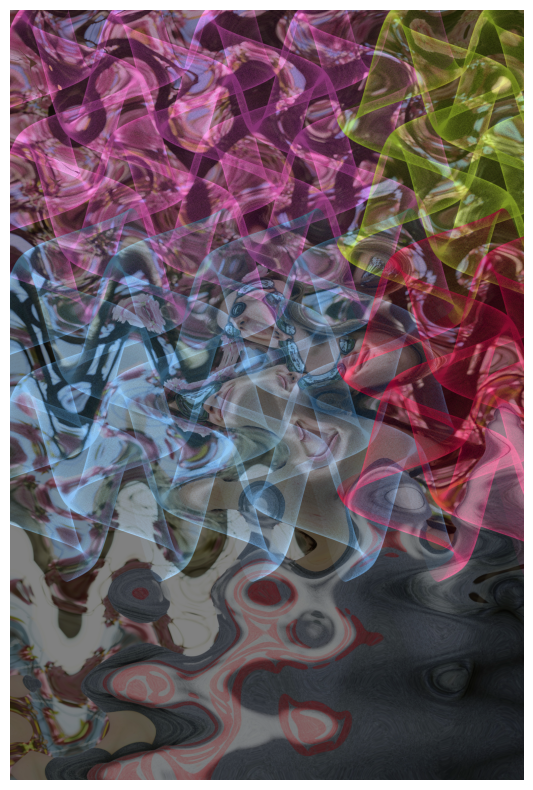

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Load the image
image = cv2.imread('data/me.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib

# Set distortion parameters
rows, cols, _ = image.shape
frequency = random.randint(2000, 4000)  # Frequency of the waves
amplitude = random.randint(400, 1150)  # Amplitude of the waves

# Create a color map for different regions
colors = [
    [random.randint(150, 255), random.randint(0, 100), random.randint(150, 255)],
    [random.randint(0, 100), random.randint(150, 255), random.randint(150, 255)],
    [random.randint(150, 255), random.randint(150, 255), random.randint(0, 100)],
    [random.randint(150, 255), random.randint(0, 100), random.randint(0, 100)]
]

# Create a mesh grid of the original coordinates
x, y = np.meshgrid(np.arange(cols), np.arange(rows))

# Apply sinusoidal distortion
x_distorted = (x + amplitude * np.sin(8 * np.pi * y / frequency)).astype(np.float32)
y_distorted = (y + amplitude * np.cos(6 * np.pi * x / frequency)).astype(np.float32)

# Map the distorted coordinates to the original image
distorted_image = cv2.remap(image, x_distorted, y_distorted, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)

# Initialize the output image
output_image = np.zeros_like(image)

# Define groups of pixels and apply distortions
for i, (color, freq, amp) in enumerate(zip(colors, [frequency] * 4, [amplitude] * 4)):
    # Create a mask for the current group (example: different quadrants)
    mask = np.zeros((rows, cols), dtype=np.uint8)
    if i == 0:  # Top-left quadrant
        mask[0:rows//2, 0:cols//2] = 255
    elif i == 1:  # Top-right quadrant
        mask[0:rows//2, cols//2:cols] = 255
    elif i == 2:  # Bottom-left quadrant
        mask[rows//2:rows, 0:cols//2] = 255
    elif i == 3:  # Bottom-right quadrant
        mask[rows//2:rows, cols//2:cols] = 255

    # Create a mesh grid for the current group
    y_indices, x_indices = np.where(mask == 255)
    for x, y in zip(x_indices, y_indices):
        # Apply different sinusoidal distortions based on the group
        y_distorted = x + int(amp * np.sin(8 * np.pi * y / freq))
        x_distorted = y + int(amp * np.cos(6 * np.pi * x / freq))
        
        # Ensure the distorted indices are within bounds
        if 0 <= x_distorted < cols and 0 <= y_distorted < rows:
            # Set the pixel color based on the group
            output_image[y_distorted, x_distorted] = color

# Blend with original image to see the distortions
final_image = cv2.addWeighted(distorted_image, 0.5, output_image, 0.5, 0)

# Display the final image
plt.figure(figsize=(10, 10))
plt.imshow(final_image)
plt.axis('off')
plt.show()


In [14]:
cv2.imwrite('data/distorted_image4.jpg', cv2.cvtColor(final_image, cv2.COLOR_RGB2BGR))

True

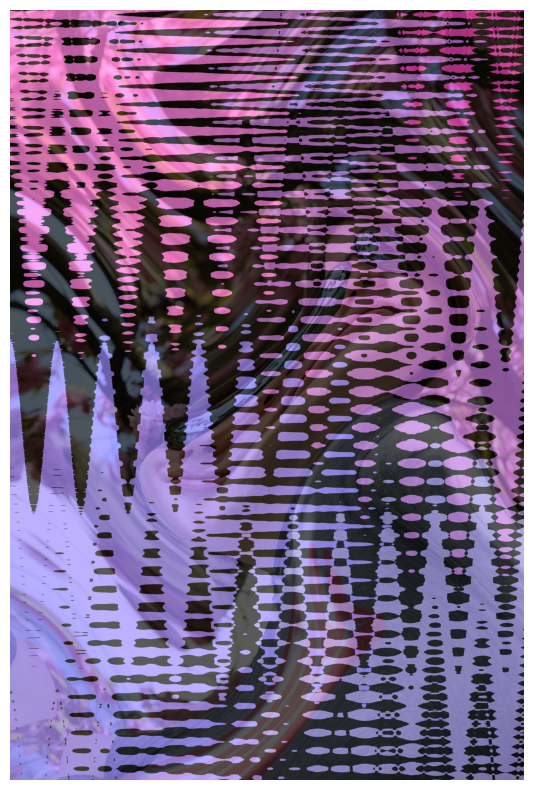

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage import morphology
from noise import pnoise2  # Import Perlin noise

seed = 54 # Seed for random number generation

random.seed(seed)  # Set random seed for reproducibility
np.random.seed(seed)

# Load the image
image = cv2.imread('data/me.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib

# Set parameters
rows, cols, _ = image.shape
scale = random.randint(1000, 4000)  # Scale of Perlin noise
num_regions = random.randint(2500, 6000)  # Approximate number of regions

# Generate Perlin noise for smooth, organic patterns
perlin_noise = np.zeros((rows, cols))
for i in range(rows):
    for j in range(cols):
        perlin_noise[i][j] = pnoise2(i / scale, j / scale, octaves=6, persistence=0.25, lacunarity=2.0, repeatx=cols, repeaty=rows, base=seed)

# Normalize the noise to the range [0, 255]
perlin_noise = ((perlin_noise - perlin_noise.min()) * (255 / (perlin_noise.max() - perlin_noise.min()))).astype(np.uint8)

# Threshold the noise to create regions
_, regions = cv2.threshold(perlin_noise, 128, 255, cv2.THRESH_BINARY)

# Further separate into more regions by applying erosion and dilation
regions = morphology.label(morphology.dilation(morphology.erosion(regions, morphology.disk(random.randint(5, 22))), morphology.disk(random.randint(35, 56))))

# Generate random colors for each unique region
unique_regions = np.unique(regions)
region_colors = {
    region_id: [random.randint(128, 255), random.randint(0, 178), random.randint(128, 255)]
    for region_id in unique_regions if region_id != 0
}

# Initialize the overlay with random colors based on the regions
overlay = np.zeros_like(image)
for y in range(rows):
    for x in range(cols):
        region_id = regions[y, x]
        if region_id != 0:  # Ignore the background
            overlay[y, x] = region_colors[region_id]

# Apply sinusoidal distortion to the overlay for an extra psychedelic effect
frequency = random.randint(2000, 4000)  # Frequency of the waves
amplitude = random.randint(400, 1150)  # Amplitude of the waves

# Apply sinusoidal distortion to the overlay for an extra psychedelic effect
frequency_img = random.randint(1200, 2000)  # Frequency of the waves
amplitude_img = random.randint(400, 1000)  # Amplitude of the waves

# Create mesh grid for distortion
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
x_distorted = (x + amplitude * np.sin(42 * np.pi * y / frequency)).astype(np.float32)
y_distorted = (y + amplitude * np.cos(16 * np.pi * x / frequency)).astype(np.float32)

x_img, y_img = np.meshgrid(np.arange(cols), np.arange(rows))
x_distorted_img = (x + amplitude * np.sin(2 * np.pi * y / frequency)).astype(np.float32)
y_distorted_img = (y + amplitude * np.cos(2 * np.pi * x / frequency)).astype(np.float32)

# Remap the overlay to apply the distortion
distorted_overlay = cv2.remap(overlay, x_distorted, y_distorted, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)
distorted_image = cv2.remap(image, x_distorted_img, y_distorted_img, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)

alpha = 0.35
beta = 0.7
# Blend with original image
# final_image = cv2.addWeighted(image, alpha, distorted_overlay, beta, 0)
final_image = cv2.addWeighted(distorted_image, alpha, distorted_overlay, beta, 0)

# Display the final image
plt.figure(figsize=(10, 10))
plt.imshow(final_image)
plt.axis('off')
plt.show()

In [71]:
cv2.imwrite('data/distorted_image10.jpg', cv2.cvtColor(final_image, cv2.COLOR_RGB2BGR))

True